In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from mnist import MNIST

In [44]:
class PCA:
    def __init__(self, k):
        self.k = k
        self.mean = None
        self.matrix = None

    def fit(self, data):
        """
        performs SVD to get the transformation matrix
        """
        S = np.zeros((data.shape[1],data.shape[1]))
        self.mean = np.mean(data,axis=1).reshape(-1,1)
        data = data - self.mean
        S = np.cov(data.T)
        u,s, vh = np.linalg.svd(S)
        self.matrix = u[:self.k]      
    def transform(self, data):
        """
        projects data to lower dimensional space
        """
        data = data - self.mean
        Y = np.dot(self.matrix,data.T)  
        return Y
    def inverse_transform(self, data_transformed):
        """
        reconstructs the data
        """
        Y =  np.dot(data_transformed.T,self.matrix)
        return Y
        


In [45]:
# TODO: Generate data with some linear correlations and check the performance of your algorithm

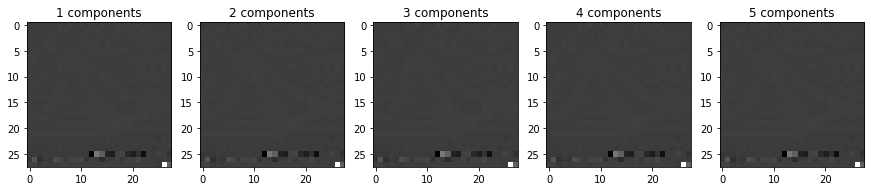

In [46]:
mndata = MNIST('../Data/')
images, labels = mndata.load_training()
images = np.array(images,dtype=float)
model = PCA(1)
model.fit(images)
X_tr = model.transform(images)
X_inv = model.inverse_transform(X_tr)

# TODO: Fit PCA with 5 components


# TODO: Plot each component in subplots (name subplots with ccomponent number)


# TODO: Save the plot with name "MNIST_Components_Yourname"
n_comps = [1, 2, 3, 4, 5]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,20))
for ax,i,n_comp in zip(axes.flatten(),range(len(n_comps)), n_comps):
    pca = PCA(n_comp)
    model.fit(images)
    X_tr = model.transform(images)
    X_inv = model.inverse_transform(X_tr)
    ax.imshow(X_inv[0].reshape((28, 28)),cmap='gray')
    ax.set_title("{} components".format(n_comp))
